# Land Cover Change - Urbanization
Change in land cover class (as defined by [Copernicus Global Land Cover](https://lcviewer.vito.be/about)): any type of land cover (excluding water) changing into built-up space. Not disaggregated.  

Note that this is a parameterized widget; the specification passed to the API will not be renderable without the geostore identifier being inserted.

_Author: Peter Kerins_  
_Created: 14 Jun 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Ocean Watch country page - parameterized chart
- Time series
- Vertical bar

## Data
Surface areas [calculated on Google Earth Engine](https://code.earthengine.google.com/1a106a75689826e6bf7283b7d7c7f6f5); outputs combined and restructured via [Python script](../../datasets/ocn_calcs_016_land_cover_change/land-cover-change-structuring.py).  
Carto: [soc_104b](https://resourcewatch.carto.com/u/wri-rw/dataset/soc_104b_land_cover_change)  

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [4]:
widget_width = 400
widget_height = 300

# Widget

## Demo Query
`gid_0 ILIKE <iso3>` used as stand-in for parameterized `geostore_id={{geostore_id}}` in production version
```sql
SELECT gadm.gid_0, gadm.name_0, variable, date, value, unit 
FROM soc_104b_land_cover_change data INNER JOIN gadm36_0 gadm ON gadm.gid_0 = data.gid_0 
WHERE variable = 'anyUrban' AND gadm.gid_0 ILIKE 'BRA' 
ORDER BY gadm.gid_0 ASC, date ASC, variable DESC
```

## Parameterized Query
```sql
SELECT gadm.gid_0, gadm.name_0, variable, date, value, unit 
FROM soc_104b_land_cover_change data INNER JOIN gadm36_0 gadm ON gadm.gid_0 = data.gid_0 
WHERE variable = 'anyUrban' AND gadm.{{geostore_env}} ILIKE '{{geostore_id}}' 
ORDER BY gadm.gid_0 ASC, date ASC, variable DESC
```

## Specification
Code presented in notebook is already written for RW (rather than standard Vega). This does not extent to parameterization.

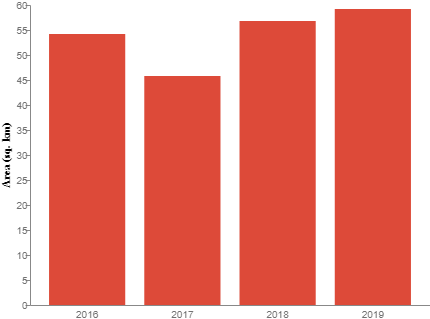

In [8]:
spec=json.loads("""
{
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gadm.gid_0, gadm.name_0, variable, date, value, unit FROM soc_104b_land_cover_change data INNER JOIN gadm36_0 gadm ON gadm.gid_0 = data.gid_0 WHERE variable = 'anyUrban' AND gadm.{{geostore_env}} ILIKE '{{geostore_id}}' ORDER BY gadm.gid_0 ASC, date ASC, variable DESC",
      "format": {
        "type": "json", "property": "rows"
      },
      "transform": [
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "date"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "value"},
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Area (sq. km)",
      "titleFont": "Lato",
      "encode": {
        "labels": {
          "interactive": false,
          "enter": {
          },
          "update": {
            "align": {"value": "right"},
            "baseline": {"value": "middle"},
            "dx": {"value": 4},
            "fill": {"value": "#717171"}
          },
          "hover": {"fill": {"value": "firebrick"}}
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": false,
          "enter": {
          },
          "update": {
            "fill": {"value": "#717171"}
          },
          "hover": {
            "fill": {
              "value": "black"
            }
          }
        }
      }
    }
  ],
  "marks": [
    {
      "name": "bars",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "date"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "value": 0},
          "y2": {"scale": "yscale", "field": "value"},
          "fill": {"value": "#DD4A39"}
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    }
  ],
  "legends": [
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "value",
            "property": "Area (sq. km)",
            "type": "number",
            "format": ",.1f"
          }
        ]
      }
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
## PARAMETERIZE WIDGET
vega_view['data'][0]['url']= vega_view['data'][0]['url'].replace('{{geostore_env}}','geostore_prod')
vega_view['data'][0]['url'] = vega_view['data'][0]['url'].replace('{{geostore_id}}','ca5bfde08587530e76c17fe48362a01d')
## FONT
vega_view['axes'][1]['titleFont'] = 'Arial'
Vega(vega_view)

# RW API
Parent dataset [soc.104.rw0 Global Land Cover](https://resourcewatch.org/data/explore/Global-Land-Cover-UN-FAO-LCCS-Classification) ([Admin](https://resourcewatch.org/admin/data/datasets/b2f00f99-46ed-43e6-a7a1-a5809d9369d4/edit))    
[API ID](https://api.resourcewatch.org/v1/dataset/b2f00f99-46ed-43e6-a7a1-a5809d9369d4/) `b2f00f99-46ed-43e6-a7a1-a5809d9369d4`  
[Widgets](https://api.resourcewatch.org/v1/dataset/b2f00f99-46ed-43e6-a7a1-a5809d9369d4/widget)

Widgets created via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer).  

## Example: Brazil

In [2]:
dataset_id = 'b2f00f99-46ed-43e6-a7a1-a5809d9369d4'
name = 'Land Cover Change in Brazil, 2015–2019: Urbanization'
description = 'Area of land that transitioned to built-up, year on year'

- [Brazil](https://api.resourcewatch.org/v1/widget/6010a72c-3b62-4076-abd7-f4921f6f4605?env=production) `6010a72c-3b62-4076-abd7-f4921f6f4605`  

## Parameterized Version

In [ ]:
dataset_id = 'b2f00f99-46ed-43e6-a7a1-a5809d9369d4'
name = 'Urbanization, 2015–2019'
description = 'Area of land that transitioned to built-up, year on year'

- [Country Page](https://api.resourcewatch.org/v1/widget/b8e454be-9a0f-4a8f-8e92-3d7b0fd6423f?env=production) `b8e454be-9a0f-4a8f-8e92-3d7b0fd6423f`  